# Emotional anaysis of tweets (Subset)

In [1]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import transformers
import torch
import seaborn as sns

In [146]:
df = pd.read_csv('/notebooks/Di/data/Pol5Official.csv')
df = df.append(pd.read_csv('/notebooks/Di/data/Pol7Official.csv'))
df = df.append(pd.read_csv('/notebooks/Di/data/Pol8Official.csv'))
df = df.append(pd.read_csv('/notebooks/Di/data/Pol9Official.csv'))
df = df.append(pd.read_csv('/notebooks/Di/data/Pol10Official.csv'))
df = df.append(pd.read_csv('/notebooks/Di/data/Pol11Official.csv'))

In [147]:
df.head()

,time,id,text,user,uid,hashtag,symbol,mention_username,mention_id,mention_realname,...,rtusername,quote_count,reply_count,retweet_count,favorite_count,lang,rtb,rtcheck,mentioncheck,replycheck
0,2020-05-14 20:20:03+00:00,1261028523772391424,Too many families were already struggling to n...,MurrayCampaign,158470209,NaN,NaN,NaN,NaN,NaN,...,NaN,0,0,0,0,en,False,False,False,False
1,2020-05-14 20:20:14+00:00,1261028569473585164,Widespread testing is not available in the #In...,NormaJTorres,236279233,InlandEmpire HeroesAct,NaN,NaN,NaN,NaN,...,NaN,0,0,0,0,en,False,False,False,False
2,2020-05-14 20:22:28+00:00,1261029130931449877,Hard hit communities like Prince George’s cont...,RepAnthonyBrown,823552974253342721,NaN,NaN,NaN,NaN,NaN,...,NaN,0,0,0,0,en,False,False,False,False
3,2020-05-14 20:22:49+00:00,1261029218693132288,"""Social distancing is a blunt instrument and i...",RepLoriTrahan,1079802482640019456,TrahanTownHall,NaN,NaN,NaN,NaN,...,NaN,0,0,0,0,en,False,False,False,False
4,2020-05-14 20:23:09+00:00,1261029305502576640,Celebrating the charter schools in Wisconsin a...,SenRonJohnson,233737858,CharterSchoolsWeek,NaN,NaN,NaN,NaN,...,NaN,0,0,0,0,en,False,False,False,False


In [148]:
df.shape

(53238, 51)

In [149]:
#Converting to DateTime
df['time'] = df['time'].apply(lambda timestamp : pd.to_datetime(timestamp))

#Extracting the weeks and months from the dates
df['month'] = df['time'].apply(lambda date: date.month)
df['week'] = df['time'].apply(lambda date: date.week)

/tmp/ipykernel_30526/3813699212.py:6: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = df['time'].apply(lambda date: date.week)


In [151]:
from transformers import pipeline

# First we will classify based on specific emotions
classifier = pipeline('text-classification', model='bhadresh-savani/distilbert-base-uncased-emotion', return_all_scores=True, )

df['Emotions'] = df['text'].apply(lambda tweet: classifier(tweet))

KeyboardInterrupt: 

In [ ]:
#Now we are going to find sentiments with twitter roberta
SentClassify = pipeline("sentiment-analysis", model='cardiffnlp/twitter-roberta-base-sentiment-latest', tokenizer='cardiffnlp/twitter-roberta-base-sentiment-latest')

#This may be less accurate as this is truncated to the old twitter length
df['Bert_Scents'] = df['text'].apply(lambda tweet: SentClassify(tweet))

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [14]:
df['VADER_Scents'] = df['text'].apply(lambda tweet: sid.polarity_scores(tweet))

In [16]:
#df.to_csv('/notebooks/evanc/KoReCOVID/resources/Future file name!@#$..csv') Uncomment for large amounts of data to avoid
#repition
df.head()

,time,id,text,user,uid,mention_username,mention_id,mention_realname,url,expanded_url,...,user_verified,lang,rtb,mentioncheck,replycheck,month,week,Emotions,Bert_Scents,VADER_Scents
221147,2020-05-25 01:14:36+00:00,1264726527582834689,@JillianViva @dvillella @WestJournalism @realD...,Noel85476058,1254976016143060992,JillianViva dvillella WestJournalism realDonal...,1212562308431368193 43014978 46520074 25073877,Awake Atlanta Barber💈 D Villella ❄️ The Wester...,https://t.co/p3hsEmJ8h0,https://twitter.com/i/web/status/1264726527582...,...,False,en,True,True,False,5,22,"[[{'label': 'sadness', 'score': 0.047033604234...","[{'label': 'Negative', 'score': 0.822658061981...","{'neg': 0.157, 'neu': 0.705, 'pos': 0.139, 'co..."
278384,2020-05-27 14:16:40+00:00,1265648116289736704,Can’t stop laughing at @realDonaldTrump threat...,Susan12421176,1221107945339072517,realDonaldTrump,25073877,Donald J. Trump,https://t.co/AEHsQEyxcw,https://twitter.com/i/web/status/1265648116289...,...,False,en,True,True,False,5,22,"[[{'label': 'sadness', 'score': 0.014711262658...","[{'label': 'Negative', 'score': 0.928338110446...","{'neg': 0.283, 'neu': 0.615, 'pos': 0.102, 'co..."
228368,2020-05-25 14:15:04+00:00,1264922941202083842,@DeborahLarca @TalbertSwan @realDonaldTrump Ye...,xraydeb1,60053227,DeborahLarca TalbertSwan realDonaldTrump,794975314497642501 16873455 25073877,Deborah Larca Bishop Talbert Swan Donald J. Trump,https://t.co/YCBaDMPpT0,https://twitter.com/i/web/status/1264922941202...,...,False,en,True,True,False,5,22,"[[{'label': 'sadness', 'score': 0.002228826284...","[{'label': 'Negative', 'score': 0.611606180667...","{'neg': 0.08, 'neu': 0.515, 'pos': 0.405, 'com..."
20413,2020-05-15 20:01:04+00:00,1261386135097532418,@StateDept @SecPompeo Hydroxychloroquine works...,GodsEsther777,785199901541937152,StateDept SecPompeo,9624742 988573326376427520,Department of State Secretary Pompeo,https://t.co/gZOiTp6s3B,https://twitter.com/i/web/status/1261386135097...,...,False,en,True,True,False,5,20,"[[{'label': 'sadness', 'score': 0.281555086374...","[{'label': 'Neutral', 'score': 0.4767656028270...","{'neg': 0.17, 'neu': 0.789, 'pos': 0.04, 'comp..."
39072,2020-05-16 11:44:58+00:00,1261623674899226625,@IlhanMN What an idiot. Wearing gloves and the...,GOPer4life84,1204484608907206656,IlhanMN,783792992,Ilhan Omar,NaN,NaN,...,False,en,True,True,True,5,20,"[[{'label': 'sadness', 'score': 0.015757448971...","[{'label': 'Negative', 'score': 0.902479767799...","{'neg': 0.196, 'neu': 0.726, 'pos': 0.079, 'co..."


In [17]:
#Resetting the indexs for quality of life purposes
df = df.reset_index()

In [18]:
#Let's take a look at the sentiments
#Now that have sentiments for each tweet I am going to try to standardize this data and merge it back into the main dataframe
#This is so that I can do visualizations with relative ease
df[['id','Emotions','Bert_Scents','VADER_Scents']]

,id,Emotions,Bert_Scents,VADER_Scents
0,1264726527582834689,"[[{'label': 'sadness', 'score': 0.047033604234...","[{'label': 'Negative', 'score': 0.822658061981...","{'neg': 0.157, 'neu': 0.705, 'pos': 0.139, 'co..."
1,1265648116289736704,"[[{'label': 'sadness', 'score': 0.014711262658...","[{'label': 'Negative', 'score': 0.928338110446...","{'neg': 0.283, 'neu': 0.615, 'pos': 0.102, 'co..."
2,1264922941202083842,"[[{'label': 'sadness', 'score': 0.002228826284...","[{'label': 'Negative', 'score': 0.611606180667...","{'neg': 0.08, 'neu': 0.515, 'pos': 0.405, 'com..."
3,1261386135097532418,"[[{'label': 'sadness', 'score': 0.281555086374...","[{'label': 'Neutral', 'score': 0.4767656028270...","{'neg': 0.17, 'neu': 0.789, 'pos': 0.04, 'comp..."
4,1261623674899226625,"[[{'label': 'sadness', 'score': 0.015757448971...","[{'label': 'Negative', 'score': 0.902479767799...","{'neg': 0.196, 'neu': 0.726, 'pos': 0.079, 'co..."
...,...,...,...,...
495,1265681121527955457,"[[{'label': 'sadness', 'score': 0.463701844215...","[{'label': 'Negative', 'score': 0.909497439861...","{'neg': 0.249, 'neu': 0.639, 'pos': 0.111, 'co..."
496,1263208176859729921,"[[{'label': 'sadness', 'score': 0.009236291982...","[{'label': 'Negative', 'score': 0.934459745883...","{'neg': 0.354, 'neu': 0.566, 'pos': 0.079, 'co..."
497,1265010476322156544,"[[{'label': 'sadness', 'score': 0.000758047914...","[{'label': 'Neutral', 'score': 0.6257600784301...","{'neg': 0.0, 'neu': 0.87, 'pos': 0.13, 'compou..."
498,1262186559710748672,"[[{'label': 'sadness', 'score': 0.002096320269...","[{'label': 'Neutral', 'score': 0.6296694278717...","{'neg': 0.0, 'neu': 0.804, 'pos': 0.196, 'comp..."


In [20]:
df['Emotions'] = df['Emotions'].apply(lambda scores: {i['label'] :i['score'] for i in scores[0]})

In [47]:
df['Bert_Scents'] = df['Bert_Scents'].apply(lambda scores: scores[0])
df['Bert_Scents_Category'] = df['Bert_Scents'].apply(lambda scores: scores['label'])

In [37]:
#Now let's check the formatting of everything
df.head()

,index,time,id,text,user,uid,mention_username,mention_id,mention_realname,url,...,user_verified,lang,rtb,mentioncheck,replycheck,month,week,Emotions,Bert_Scents,VADER_Scents
0,221147,2020-05-25 01:14:36+00:00,1264726527582834689,@JillianViva @dvillella @WestJournalism @realD...,Noel85476058,1254976016143060992,JillianViva dvillella WestJournalism realDonal...,1212562308431368193 43014978 46520074 25073877,Awake Atlanta Barber💈 D Villella ❄️ The Wester...,https://t.co/p3hsEmJ8h0,...,False,en,True,True,False,5,22,"{'sadness': 0.047033604234457016, 'joy': 0.916...","{'label': 'Negative', 'score': 0.8226580619812...","{'neg': 0.157, 'neu': 0.705, 'pos': 0.139, 'co..."
1,278384,2020-05-27 14:16:40+00:00,1265648116289736704,Can’t stop laughing at @realDonaldTrump threat...,Susan12421176,1221107945339072517,realDonaldTrump,25073877,Donald J. Trump,https://t.co/AEHsQEyxcw,...,False,en,True,True,False,5,22,"{'sadness': 0.014711262658238411, 'joy': 0.004...","{'label': 'Negative', 'score': 0.9283381104469...","{'neg': 0.283, 'neu': 0.615, 'pos': 0.102, 'co..."
2,228368,2020-05-25 14:15:04+00:00,1264922941202083842,@DeborahLarca @TalbertSwan @realDonaldTrump Ye...,xraydeb1,60053227,DeborahLarca TalbertSwan realDonaldTrump,794975314497642501 16873455 25073877,Deborah Larca Bishop Talbert Swan Donald J. Trump,https://t.co/YCBaDMPpT0,...,False,en,True,True,False,5,22,"{'sadness': 0.0022288262844085693, 'joy': 0.00...","{'label': 'Negative', 'score': 0.6116061806678...","{'neg': 0.08, 'neu': 0.515, 'pos': 0.405, 'com..."
3,20413,2020-05-15 20:01:04+00:00,1261386135097532418,@StateDept @SecPompeo Hydroxychloroquine works...,GodsEsther777,785199901541937152,StateDept SecPompeo,9624742 988573326376427520,Department of State Secretary Pompeo,https://t.co/gZOiTp6s3B,...,False,en,True,True,False,5,20,"{'sadness': 0.28155508637428284, 'joy': 0.0054...","{'label': 'Neutral', 'score': 0.47676560282707...","{'neg': 0.17, 'neu': 0.789, 'pos': 0.04, 'comp..."
4,39072,2020-05-16 11:44:58+00:00,1261623674899226625,@IlhanMN What an idiot. Wearing gloves and the...,GOPer4life84,1204484608907206656,IlhanMN,783792992,Ilhan Omar,NaN,...,False,en,True,True,True,5,20,"{'sadness': 0.015757448971271515, 'joy': 0.001...","{'label': 'Negative', 'score': 0.9024797677993...","{'neg': 0.196, 'neu': 0.726, 'pos': 0.079, 'co..."


In [39]:
df['Highest_Emotion'] = df['Emotions'].apply(lambda emotions: max(emotions, key=emotions.get))

In [40]:
def Classify_Sentiment(score):
    if score >= 0.2:
        return 'pos'
    elif score <= -0.2: 
        return 'neg'
    else:
        return 'neu'

In [43]:
df['VADER_Sents_Cat'] = df['VADER_Scents'].apply(lambda x: Classify_Sentiment(x['compound']))

In [78]:
#Getting the average emotion for each day
df['day'] = df['time'].apply(lambda time: time.day)

In [107]:
for day in df['day'].unique():
    emotion = df[df['day'] == day]['Highest_Emotion'].value_counts().keys()[0]
    df.loc[df['day'] == day,'Highest_Weekly_Avg_Emotion'] = emotion

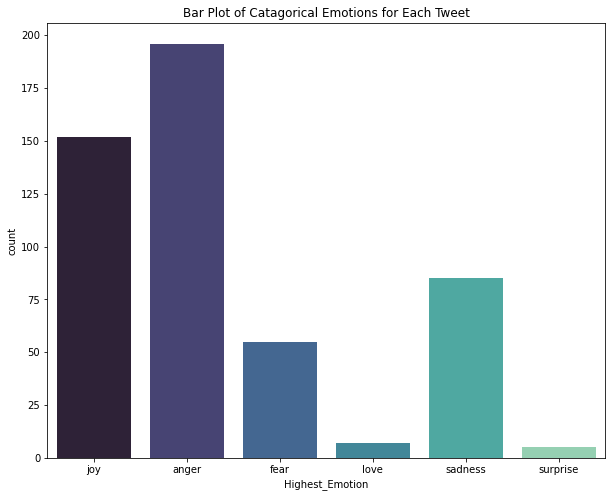

In [128]:
# Now that I have categorical variables for each of these metics I will make some bar charts
plt.figure(figsize=(10,8))
plt.title('Bar Plot of Catagorical Emotions for Each Tweet')
plt.xlabel('Highest Probability Emotion')
countPlot = sns.countplot(data=df, x='Highest_Emotion',palette='mako')
figure = countPlot.get_figure()
figure.savefig('/notebooks/evanc/KoReCOVID/Plots/Pol5_Plots/Emotions.jpg',dpi=400)

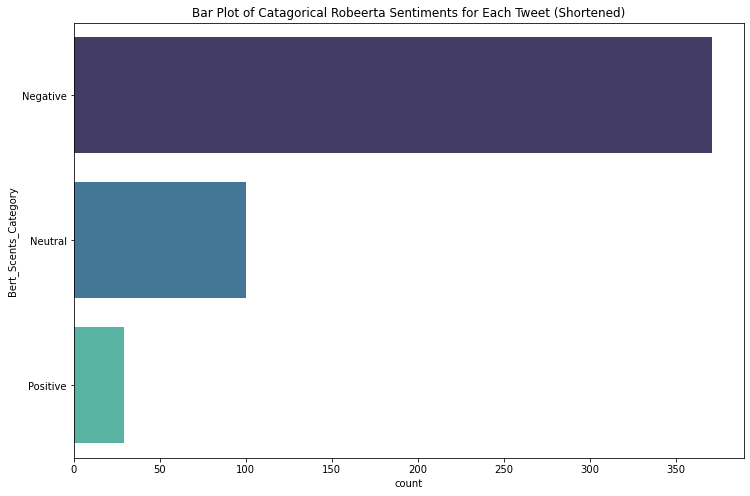

In [129]:
# 2) Bert Sentiments
plt.figure(figsize=(12,8))
plt.title('Bar Plot of Catagorical Robeerta Sentiments for Each Tweet (Shortened)')
countPlot = sns.countplot(data=df, y='Bert_Scents_Category',palette='mako')
figure = countPlot.get_figure()
figure.savefig('/notebooks/evanc/KoReCOVID/Plots/Pol5_Plots/Roberta_Sentiments.jpg',dpi=400)

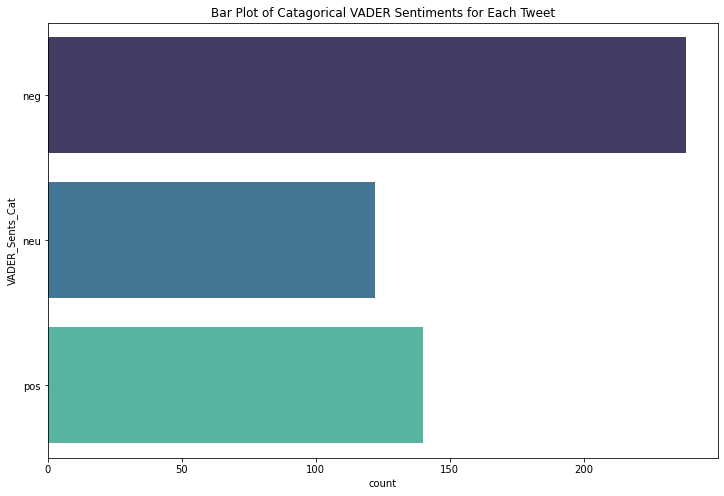

In [130]:
# 2) VADER Sentiments
plt.figure(figsize=(12,8))
plt.title('Bar Plot of Catagorical VADER Sentiments for Each Tweet')
countPlot = sns.countplot(data=df, y='VADER_Sents_Cat', order=['neg','neu','pos'], palette='mako')
figure = countPlot.get_figure()
figure.savefig('/notebooks/evanc/KoReCOVID/Plots/Pol5_Plots/Vader_Sentiments.jpg',dpi=400)

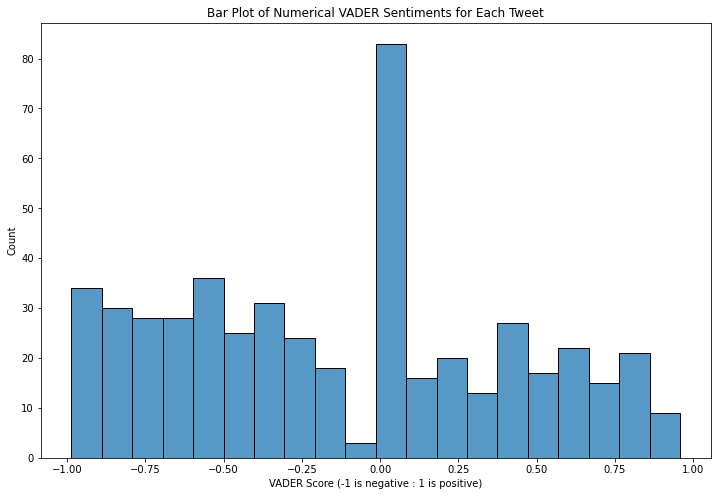

In [132]:
plt.figure(figsize=(12,8))
plt.title('Bar Plot of Numerical VADER Sentiments for Each Tweet')
plt.xlabel('VADER Score (-1 is negative : 1 is positive)')
hist = sns.histplot(df.VADER_Scents.apply(lambda x : x['compound']),bins=20)
figure = hist.get_figure()
figure.savefig('/notebooks/evanc/KoReCOVID/Plots/Pol5_Plots/Hist_VaderSentScores.jpg',dpi=400)

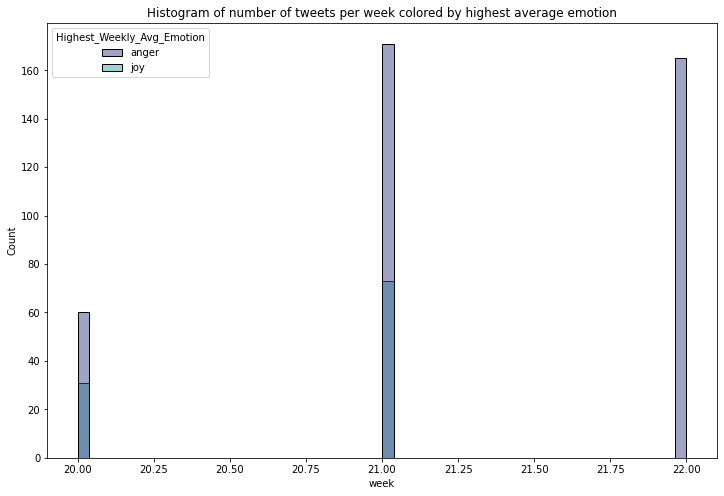

In [131]:
plt.figure(figsize=(12,8))
plt.title('Histogram of number of tweets per week colored by highest average emotion')
hist = sns.histplot(df, x='week', hue='Highest_Weekly_Avg_Emotion', bins=52, palette='mako',)
figure = hist.get_figure()
figure.savefig('/notebooks/evanc/KoReCOVID/Plots/Pol5_Plots/Avg_Emo_Over_Time.jpg',dpi=400)